# Exploratory Data Analysis of Rental Scooter Data

## Environment Set-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#summary function extracts statistical summary within dataset
def summary(df, pred=None):

    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_pct = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    if pred is None:
        #if ylabel not given, code will not output correlation matrix
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing pct', 'uniques', 'skewness', 'kurtosis']
        summary = pd.concat([types, counts, distincts, nulls, missing_pct, uniques, skewness, kurtosis], axis = 1)
    else:
        #when ylabel given, correlation with ylabel will be shown
        corr = df.corr()[pred]
        summary = pd.concat([types, counts, distincts, nulls, missing_pct, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_pct', 'uniques', 'skewness', 'kurtosis', corr_col ]  
    summary.columns = cols
    return summary
    
#part_day function transform time variable into part of day categorical variable    
def part_day(series):
    if (series >= 6) & (series <= 11):
        return "morning"
    if (series >= 12) & (series <= 17):
        return "afternoon"
    if (series >= 18) & (series <= 23):
        return "evening"
    if (series >= 0) & (series <= 5):
        return "night"
    
#seasons function transform month variable into seasons categorical variable
def seasons(series):
    if (series == 12) | (series == 1) | (series ==2):
        return "winter"
    if (series >= 3) & (series <= 5):
        return "spring"
    if (series >= 6) & (series <= 8):
        return "summer"
    if (series >= 9) & (series <= 11):
        return "autumn"

We begin with the environment set-up by importing all the libraries and user-defined functions that will be used in this notebook.

This exploratory data analysis (EDA) process aims to study the scooter rental data for a particular e-scooter rental service in a city. The dataset would then be used to predict the hourly value of the total number of active users of the e-scooter rental service in order to help in demand forecasting.

<br>

## 1. Initial Analysis

In [2]:
url = "https://aisgaiap.blob.core.windows.net/aiap6-assessment-data/scooter_rental_data.csv"
df = pd.read_csv(url)
#import data from url

df.shape
#inspect the size of the dataset

(17958, 10)

There are 17958 observations and 10 variables in this dataset.

In [3]:
df.info()
#inspect the dataset columns and its respective types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17958 entries, 0 to 17957
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    17958 non-null  object 
 1   hr                      17958 non-null  int64  
 2   weather                 17958 non-null  object 
 3   temperature             17958 non-null  float64
 4   feels-like-temperature  17958 non-null  float64
 5   relative-humidity       17958 non-null  float64
 6   windspeed               17958 non-null  float64
 7   psi                     17958 non-null  int64  
 8   guest-users             17958 non-null  int64  
 9   registered-users        17958 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.4+ MB


We see that all the variables have 17958 non-null values. There is no need to perform imputation for null values on the dataset. Out of the 10 variables, there are 3 categorical variables (date, hr, and weather), while the other 7 variables are continuous variables.

The target variables in this dataset would be the **"guest-users"** and **"registered-users"** variable, which depicts the number of active guest and registered users for the rental scooter at a particular hour within a day.

Given that most of the feature variables in the dataset are related to **meteorology**, we can shift the focus of the analysis towards how **atmospheric conditions** would affect the target variables. One way to look at it would be that the atmospheric conditions affects the comfortability of being outdoors. If the conditions are favourable for outdoor activities, we would expect scooter rentals to increase as there will be a larger proportion of people outdoors. This would hence increase the  probabibility for people to rent the scooters for their needs, vice versa.

In [4]:
df["date"] = pd.to_datetime(df["date"])
df = pd.DataFrame.sort_values(df,by="date")
df.head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
0,2011-01-01,0,clear,66.7,95.0,81.0,0.0,3,21,164
23,2011-01-01,23,cloudy,85.3,114.8,88.0,20.0,7,104,310
22,2011-01-01,22,cloudy,80.2,109.4,94.0,15.0,44,75,220
21,2011-01-01,21,cloudy,80.2,109.4,87.0,13.0,12,19,400
20,2011-01-01,20,cloudy,80.2,109.4,87.0,17.0,4,79,325


In [5]:
df.tail()
#inspect the head and tail of the dataset

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
17357,2012-12-31,2,clear,59.9,80.6,59.0,11.0,15,20,106
17356,2012-12-31,1,clear,61.6,82.4,55.0,13.0,26,43,172
17355,2012-12-31,0,clear,61.6,82.4,55.0,13.0,1,29,387
17368,2012-12-31,13,cloudy,68.4,91.4,44.0,11.0,44,265,2140
17364,2012-12-31,9,cloudy,61.6,86.0,64.0,7.0,29,91,1876


Inspecting the head and tail of the dataset to get a rough idea of the variables and observations within the data. 
By sorting the data by date, we observe that the date range for the data is from **1st Jan 2011 - 31st Dec 2012**.

In [6]:
df.describe()
#df_describe allows us to check on the numerical variables

,hr,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
count,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000
mean,11.533578,88.457512,117.332008,62.758993,12.733155,24.557300,249.740394,1998.910346
std,6.915319,16.285017,20.416251,19.266532,8.213750,14.451091,344.815252,1966.561546
min,0.000000,48.100000,60.800000,0.000000,0.000000,0.000000,-2.000000,-5.000000
25%,6.000000,75.200000,100.400000,48.000000,7.000000,12.000000,27.000000,441.000000
50%,12.000000,88.700000,118.400000,63.000000,13.000000,24.000000,117.000000,1504.000000
75%,18.000000,102.200000,134.600000,78.000000,17.000000,37.000000,338.000000,2860.000000
max,23.000000,131.000000,179.600000,100.000000,57.000000,49.000000,2567.000000,11519.000000


From df.describe, we can draw some initial insights into the numerical variables.

Some of the key takeaways are:
* The **range of values for psi is from 0-49**. These values all lie within the healthy range, hence they might not make a difference in the prediction of the target variables.
* **Minimum values for guest-users and registered-users are negative**. We have to determine what the negative values mean, otherwise it might be better to truncate them.
* **Minimum value for relative-humidity is 0**. This is not possible in the real world as 0% relative humidity can only be achieved in a closed space experimental set-up.

These points will be discussed further in the later part of the notebook.

In [7]:
df["weather"].value_counts()
#weather is the only categorical variable in this dataset other than time and date
#.value_counts() will allow us to check on the variable

clear              11186
cloudy              4492
light snow/rain     1429
lear                 323
CLEAR                288
loudy                111
CLOUDY                95
LIGHT SNOW/RAIN       31
heavy snow/rain        3
Name: weather, dtype: int64

There are **formatting issues** with the variable "weather". Labels "lear" and "loudy" would likely refer to "clear" and "cloudy" respectively. In addtion, some observations are labelled in upper case, while some are in lower case. We have to fix them before performing our data analysis.

<br>

## 2. Data Cleansing

### 2.1. Observations with negative values for *guest-users* and *registered-users*

In [8]:
#exploring negative user rows
neg_guest = df["guest-users"]<0 
neg_regis = df["registered-users"]<0
df_neg_user = df[neg_guest | neg_regis]
df_neg_user.head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
4,2011-01-01,4,clear,66.7,95.0,75.0,0.0,11,-2,10
30,2011-01-02,7,cloudy,80.2,109.4,76.0,13.0,42,-1,18
31,2011-01-02,8,light snow/rain,80.2,109.4,71.0,15.0,26,-1,107
47,2011-01-03,0,clear,65.0,84.2,44.0,24.0,42,-2,70
48,2011-01-03,1,clear,63.3,80.6,44.0,28.0,1,-2,26


In [9]:
df_neg_user.shape

(650, 10)

We extract the rows of data whereby guest-users < 0 and registered-users < 0. There are a total of **650 rows of data** with negative users. A common trend within these data rows would be the hour of the day "hr" and the  which mostly fall within the range 0 < hr < 10. 

These data points takes up a **small portion** of the total data **(650/17958 = 3.62%)**. There are no clear trends that could help explain the meaning behind the negative values as well. Thus, it would be better to drop these data points.

### 2.2. Observations with zero value for *relative-humidity*

In [10]:
#exploring 0 humidity rows
rel_humid_0 = df["relative-humidity"]==0 
df_rel_humid_0 = df[rel_humid_0]
df_rel_humid_0.head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
1561,2011-03-10,12,light snow/rain,81.9,111.2,0.0,15.0,6,27,390
1551,2011-03-10,0,light snow/rain,75.2,98.6,0.0,17.0,40,20,4
1553,2011-03-10,2,light snow/rain,75.2,98.6,0.0,17.0,17,-2,16
1554,2011-03-10,5,light snow/rain,76.9,102.2,0.0,13.0,39,6,29
1555,2011-03-10,6,light snow/rain,76.9,100.4,0.0,22.0,36,-2,160


All of the data points were on the day of **10th Mar 2011**. There could be problems with the relative humidity data for that particular day. Hence, we will drop these points as relative humidty will be one of the key parameters for our modelling later on.

Alternatively, we could consider imputation methods, but it will not be discussed in this notebook.

In [11]:
index_to_drop = df[rel_humid_0 | neg_guest | neg_regis ].index
df = df.drop(index_to_drop,axis = 0)

### 2.3. Formatting issues with *weather*

In [12]:
df["weather"] = np.where(df["weather"]=='loudy','cloudy',df["weather"])
df["weather"] = np.where(df["weather"]=='lear','clear',df["weather"])
df["weather"] = df["weather"].str.lower()
df["weather"].value_counts()

clear              11415
cloudy              4521
light snow/rain     1350
heavy snow/rain        3
Name: weather, dtype: int64

As discussed in the initial analysis, there are issues with the formatting for "weather" variable. After fixing them, we run value_counts() again to see the output.

The "weather" variable seems to be **heavily imbalanced**, with the "clear" class taking up about **65% of the observations**. This will be further discussed in the data enriching portion.

<br>

## 3. Data Enriching

### 3.1. *hr* and *date* variables

In [13]:
df["day_week"] = df["date"].dt.dayofweek
df["weekday"] = np.where((df["day_week"]==5)|(df["day_week"]==6),0,1)
#applies transform to "day_week" variable into dummy variable "weekday" that outputs
#1 for weekday, 0 for weekend

First, we attempt to extract more useful information within the "hr" and "date" data. 

We could extract the day of the week from the "date" data and categorize it as weekend or weekday using "weekday" dummy variable. This could provide insights into our dataset, as we could expect **ridership to be different between weekday and weekends**.

In [14]:
df["part_of_day"] = df["hr"].apply(part_day)
#applies transform to "hr" variable into 4 categorical bins that returns
#morning, afternoon, evening, or night.

"hr" variable can then be transformed into "part_of_day" categorical bins consisting of the outputs: morning, afternoon, evening, night.

We apply an even split between the 4 bins:
* Night: 12am - 5am
* Morning: 6am - 11am
* Afternoon: 12pm - 5pm
* Evening: 6pm - 11pm

The new binned variable could provide useful insights into ridership as we would expect **ridership to generally be lower in the night than in the day**.

In [15]:
df["month"] = df["date"].dt.month
#applies transform to "date" variable into categorical variable "month" that outputs
#the month in the date

We could also extract the month from the "date" data. To streamline the data further, we look into possible ways to bin the "month" variable. One possible binning strategy would be to **classify the months into seasons**. 

In order to bin months into seasons accurately, we plot the "month" against "temperature" and observe its relationship.

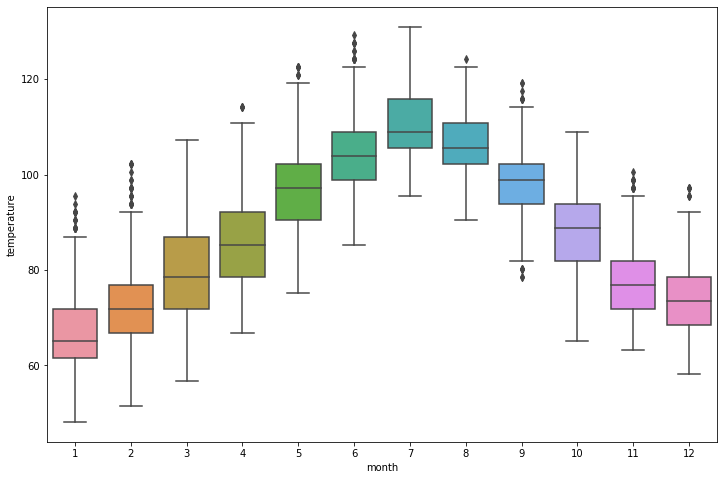

In [16]:
mth_temp_plt = plt.figure(figsize=(12,8));
sns.boxplot(x="month",y="temperature",data=df[["month","temperature"]])

The temperatures seem to be **significantly higher** during the period of **June to August**, and **significantly lower** during the period of **December to February**.

We can conclude that the dataset originated from a location that experiences the **four seasons** and follows **northern hemisphere seasons**, where summer takes place in June to August and winter takes place in December to February.

In [17]:
df["season"] = df["month"].apply(seasons)
#applies transform to "month" variable into 4 categorical bins that output the season
#that the data point was taken from (summer,autumn,winter,spring)

With the new categorical variable "season", we could use it to gather more insights into the target variable, as we would expect **ridership to generally be higher in summer, when it is more comfortable to be outdoors, than in winter**.

### 3.2. *weather* variable

In [18]:
df["weather"] = np.where(df["weather"]=="heavy snow/rain","snow/rain",df["weather"])
df["weather"] = np.where(df["weather"]=="light snow/rain","snow/rain",df["weather"])
df["weather"].value_counts()

clear        11415
cloudy        4521
snow/rain     1353
Name: weather, dtype: int64

As mentioned in the data cleansing portion, "weather" variable is heavily imbalanced, and there were only **3 observations** for the category **"heavy rain/snow"**. This would not be ideal for cross-validation later when modelling the data.

To overcome this, the strategy chosen would be to combine the categories of light and heavy rain into one category **"snow/rain"** that generalizes whether it is snowing/raining.

In [19]:
df = df[ [ col for col in df.columns if (col != 'guest-users') and (col != 'registered-users') ] + ['guest-users','registered-users'] ]
#rearranging dataframe to ease in visualization later on.

At the end of the data enriching process, we re-arrange the dataset to place the target variables at the end of the columns to keep the dataset neat and tidy.

<br>

## 4. Data Analysis

### 4.1. Distribution of continuous variables

In [20]:
summary(df)
#summary udf extracts key statistical information of variables from the dataset.

,types,counts,distincts,nulls,missing pct,uniques,skewness,kurtosis
date,datetime64[ns],17289,730,0,0.0,"[[2011-01-01 00:00:00, 2011-01-02 00:00:00, 20...",NaN,NaN
hr,int64,17289,24,0,0.0,"[[0, 23, 22, 21, 20, 19, 18, 16, 15, 14, 13, 1...",-0.063899,-1.158706
weather,object,17289,3,0,0.0,"[[clear, cloudy, snow/rain]]",NaN,NaN
temperature,float64,17289,50,0,0.0,"[[66.7, 85.3, 80.2, 81.9, 83.6, 78.5, 76.9, 65...",-0.022533,-0.938036
feels-like-temperature,float64,17289,65,0,0.0,"[[95.0, 114.8, 109.4, 111.2, 113.0, 107.6, 100...",-0.104053,-0.833445
relative-humidity,float64,17289,88,0,0.0,"[[81.0, 88.0, 94.0, 87.0, 82.0, 77.0, 72.0, 76...",-0.072388,-0.911783
windspeed,float64,17289,30,0,0.0,"[[0.0, 20.0, 15.0, 13.0, 17.0, 19.0, 6.0, 11.0...",0.579937,0.590638
psi,int64,17289,50,0,0.0,"[[3, 7, 44, 12, 4, 34, 47, 19, 41, 2, 33, 36, ...",-0.003672,-1.199532
day_week,int64,17289,7,0,0.0,"[[5, 6, 0, 1, 2, 3, 4]]",-0.025966,-1.261252
weekday,int32,17289,2,0,0.0,"[[0, 1]]",-0.904080,-1.182776


First, we retrieve key statistical information of the continuous variables in the dataset to study their distribution.

Most numerical variables have **low skew**. The only exception is **"windspeed"** with **moderate positive skew**.

The target variables **"guest-users"** and **"registered-users"** have **high positive skew** and **high kurtosis**.

We can look into **log, square root,** and **cube root transforms** to fix the skew and kurtosis problems for the variables mentioned.

Skewness and kurtosis would affect linear regression models as one of the assumptions within such models would be that the variables can be approximated to a normal distribution.

In [21]:
df2 = pd.DataFrame(df[["windspeed","guest-users","registered-users"]])

df2["log_windspeed"] = np.log1p(df["windspeed"])
df2["sqrt_windspeed"] = np.sqrt(df["windspeed"])
df2["cbrt_windspeed"] = np.cbrt(df["windspeed"])

df2["log_guest-users"] = np.log1p(df["guest-users"])
df2["sqrt_guest-users"] = np.sqrt(df["guest-users"])
df2["cbrt_guest-users"] = np.cbrt(df["guest-users"])

df2["log_registered-users"] = np.log1p(df["registered-users"])
df2["sqrt_registered-users"] = np.sqrt(df["registered-users"])
df2["cbrt_registered-users"] = np.cbrt(df["registered-users"])

summary(df2)

,types,counts,distincts,nulls,missing pct,uniques,skewness,kurtosis
windspeed,float64,17289,30,0,0.0,"[[0.0, 20.0, 15.0, 13.0, 17.0, 19.0, 6.0, 11.0...",0.579937,0.590638
guest-users,int64,17289,1191,0,0.0,"[[21.0, 104.0, 75.0, 19.0, 79.0, 41.0, 62.0, 2...",2.458908,7.314653
registered-users,int64,17289,4929,0,0.0,"[[164.0, 310.0, 220.0, 400.0, 325.0, 402.0, 33...",1.533218,2.671367
log_windspeed,float64,17289,30,0,0.0,"[[0.0, 3.044522437723423, 2.772588722239781, 2...",-1.473266,1.294563
sqrt_windspeed,float64,17289,30,0,0.0,"[[0.0, 4.47213595499958, 3.872983346207417, 3....",-0.884682,0.472950
cbrt_windspeed,float64,17289,30,0,0.0,"[[0.0, 2.7144176165949068, 2.4662120743304703,...",-1.505810,1.434564
log_guest-users,float64,17289,1191,0,0.0,"[[3.091042453358316, 4.653960350157523, 4.3307...",-0.647371,-0.069651
sqrt_guest-users,float64,17289,1191,0,0.0,"[[4.58257569495584, 10.198039027185569, 8.6602...",0.956623,0.669974
cbrt_guest-users,float64,17289,1191,0,0.0,"[[2.7589241763811208, 4.7026693754415145, 4.21...",0.389381,-0.276865
log_registered-users,float64,17289,4929,0,0.0,"[[5.10594547390058, 5.739792912179234, 5.39816...",-1.017630,0.560850


We perform the transformation and evaluate the transformed variables. 

**Skewness of windspeed did not improve** with any of the transformation. Hence, we would leave the variable as it is with moderate positive skew.

**Cube root transform** seems to be the best transform for both guest-users and registered-users in unskewing the variable and reducing its kurtosis.

Thus, we will add the cube root transformed target variables to our dataset. Having these variables which can be approximated to a normal distribution better could aid in our modelling step later on.

Text(0.5, 1.0, 'cbrt_registered-users')

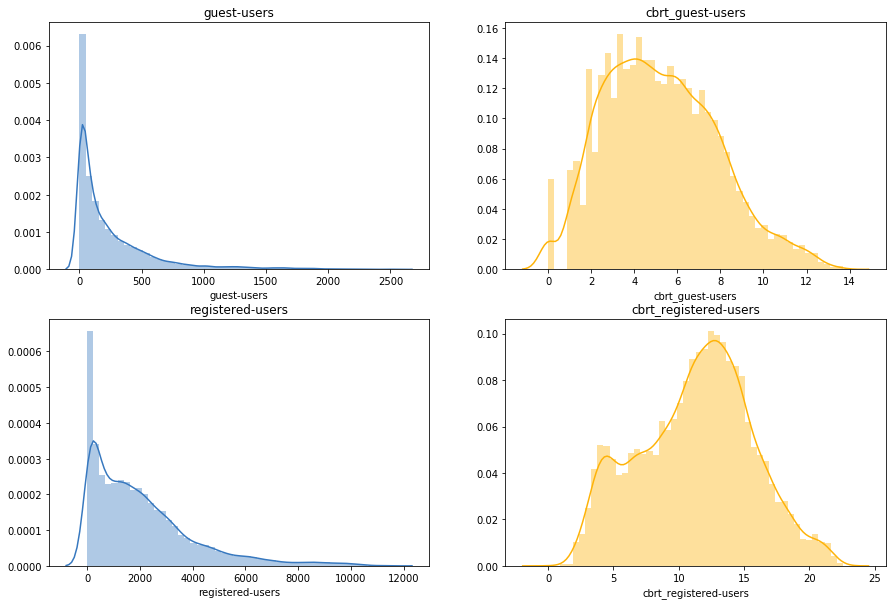

In [22]:
df["cbrt_registered-users"] = np.cbrt(df["registered-users"])
df["cbrt_guest-users"] = np.cbrt(df["guest-users"])

#plot of cbrt transformed target variables & the original variable
kde_plot = plt.figure(figsize=(15,10))
fig1 = kde_plot.add_subplot(221);
sns.distplot(df["guest-users"],color="xkcd:windows blue")
fig1.set_title("guest-users")
fig2 = kde_plot.add_subplot(222);
sns.distplot(df["cbrt_guest-users"],color="xkcd:amber")
fig2.set_title("cbrt_guest-users")
fig3 = kde_plot.add_subplot(223);
sns.distplot(df["registered-users"],color="xkcd:windows blue")
fig3.set_title("registered-users")
fig4 = kde_plot.add_subplot(224);
sns.distplot(df["cbrt_registered-users"],color="xkcd:amber")
fig4.set_title("cbrt_registered-users")


### 4.2. Distribution of categorical variables

Text(0.5, 1.0, 'weekday')

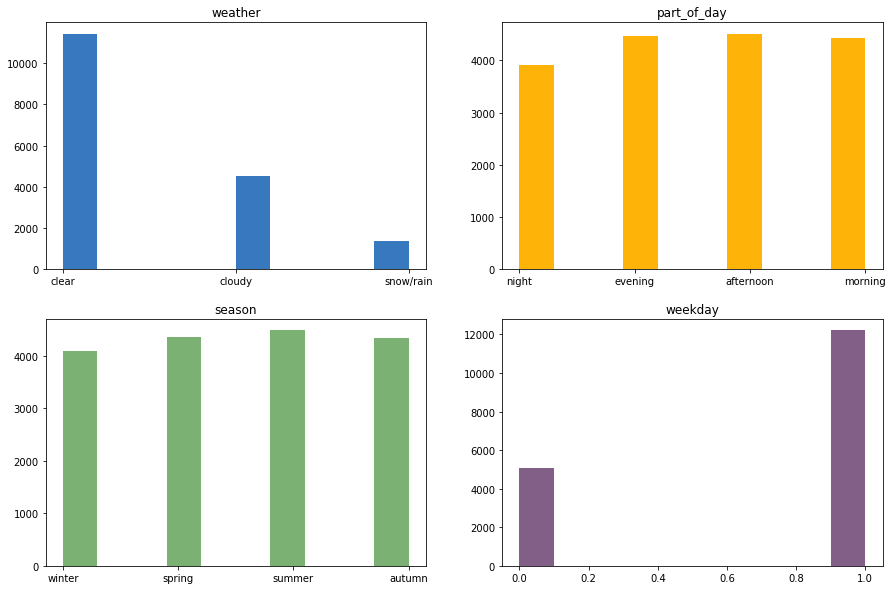

In [23]:
#histograms of categorical variable to check on their distributions
cat_plot = plt.figure(figsize=(15,10))
fig1 = cat_plot.add_subplot(221);
plt.hist(df["weather"],color="xkcd:windows blue")
fig1.set_title("weather")
fig2 = cat_plot.add_subplot(222);
plt.hist(df["part_of_day"],color="xkcd:amber")
fig2.set_title("part_of_day")
fig3 = cat_plot.add_subplot(223);
plt.hist(df["season"],color="xkcd:faded green")
fig3.set_title("season")
fig4 = cat_plot.add_subplot(224);
plt.hist(df["weekday"],color="xkcd:dusty purple")
fig4.set_title("weekday")

We plot histograms of the categorical variables to inspect their distributions. No anomalies were found. 

The number of observations for "night" category within the "part_of_day" variable is **slightly lesser** than the other categories. This is due to the **removal of outliers** that was performed in the data cleansing step. The same can be said for the observations of "winter" within the "season" variable.

### 4.3. Correlation matrix

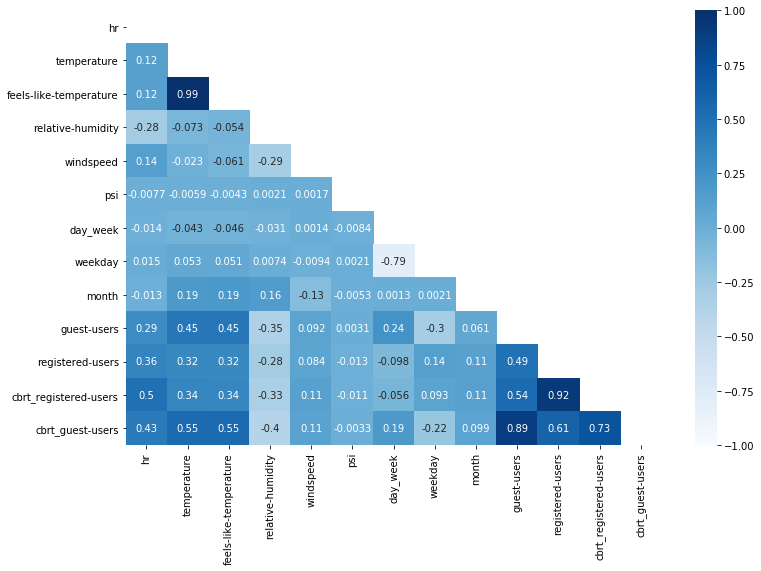

In [24]:
#create correlation matrix
df_corr_matrix = df.corr()
mask_ = np.triu(df_corr_matrix)

corr_plot = plt.figure(figsize=(12,8))
sns.heatmap(df_corr_matrix,cmap='Blues',annot=True,vmin=-1, vmax=1, center= 0, mask = mask_) 

Insights from the correlation matrix:
* We see that **guest users and registered users are not very highly correlated**. There could be some **behavioural or habitual differences** between the two groups. Hence, it could be better to do seperate models to predict guest and registered users separately before summing it up together to output the total active users. This will prevent us from **losing some of the nuances** within the data, and also adds **more flexibility** to the results from the model.
* We also observe that the cube root transformed target variables have generally **improved the correlation** with the independent variables as compared to the non-transformed counterparts. It will likely be better to use the transformed variables in the models.
* **Temperature and feel-like temperature are highly correlated as expected**. We should only use either one of these 2 temperatures or transform them into a single variable to be used for modelling to **prevent imperfect multicollinearity**.
* Most of the other numerical variables have **minimal correlation with one another**, and a **good amount of correlation with the target variables**.
* Exceptions are for the variables **"windspeed"** and **"psi"**. As mentioned in the initial analysis, the psi data ranges over an insignificant amount (most data points are still within healthy psi range). Hence, psi should be removed from the model. For "windspeed" variable, we could look into using it for feature engineering later on. 

### 4.4. Temperature vs. Feels-like temperature

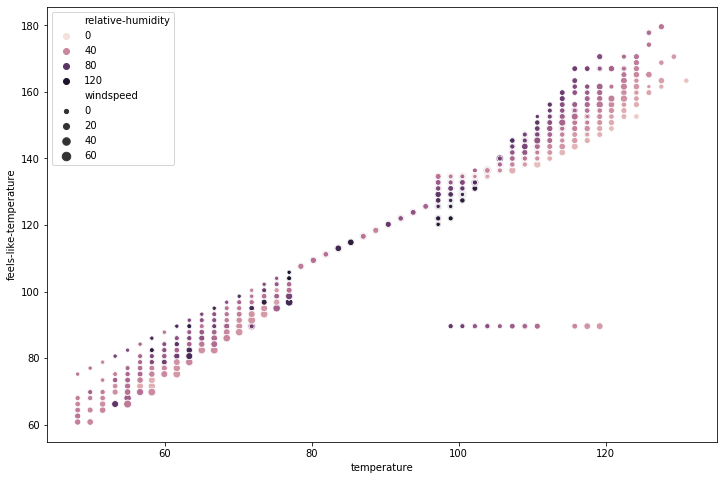

In [25]:
#taking a look at temperature vs feels-like temperature
temp_plot = plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(dark=.1, light=.9, as_cmap=True)
sns.scatterplot(x='temperature', y='feels-like-temperature', data=df[['temperature', 'feels-like-temperature']],
                hue=df["relative-humidity"],size=df["windspeed"],palette=cmap)

By plotting temperature against feels-like temperature:
* We could see that there are a set of data points whereby feels-like temperature **deviates a lot** from the general linear trend with temperature, which could point to **outliers**. They occur within the zone where **(temperature > 90°F ⋂ feels-like temperature < 100°F)**.
* For **temperatures between ~79°F  to ~97°F**, there seems to be a **perfect linear relationship** between the two variables. Feels-like temperature is mainly a function of temperature, relative-humidity and windspeed (source below). For temperature and feels-like temperature to be a perfect linear function of one another, the windspeed and relative-humidity must be kept constant.

Source: https://blog.metoffice.gov.uk/2012/02/15/what-is-feels-like-temperature/

In [26]:
#taking a closer look at these points
df_temp_outlier = df[(df["feels-like-temperature"]<100) & (df["temperature"]>90)]
df_temp_outlier.head()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,day_week,weekday,part_of_day,month,season,guest-users,registered-users,cbrt_registered-users,cbrt_guest-users
14149,2012-08-17,18,cloudy,115.8,89.6,38.0,17.0,38,4,1,evening,8,summer,758,7288,19.388139,9.117793
14146,2012-08-17,15,clear,119.2,89.6,30.0,31.0,35,4,1,afternoon,8,summer,888,3326,14.927053,9.611791
14147,2012-08-17,16,cloudy,117.5,89.6,32.0,30.0,29,4,1,afternoon,8,summer,810,4841,16.916546,9.321698
14148,2012-08-17,17,clear,115.8,89.6,36.0,22.0,15,4,1,afternoon,8,summer,1007,8408,20.334378,10.023279
14150,2012-08-17,19,cloudy,109.0,89.6,55.0,26.0,31,4,1,evening,8,summer,616,5237,17.365776,8.508642


Taking a closer look at the potential outliers, we find that the points all happen to fall on **17th Aug 2012**. There could be problems with the feels-like-temperature data source on that particular day.

In [27]:
df_temp_outlier_1 = df[(df["temperature"]>=79) & (df["temperature"]<=97)]
df_temp_outlier_1.describe()

,hr,temperature,feels-like-temperature,relative-humidity,windspeed,psi,day_week,weekday,month,guest-users,registered-users,cbrt_registered-users,cbrt_guest-users
count,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000
mean,11.546853,87.543302,117.175261,65.558296,13.170448,24.685540,2.974551,0.708818,6.848294,243.089761,2062.194713,11.322271,5.259319
std,6.977471,4.875355,5.162141,20.426626,8.566983,14.382891,2.026449,0.454352,3.409975,320.210830,1915.773742,4.271543,2.407907
min,0.000000,80.200000,109.400000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,2.000000,0.000000
25%,6.000000,83.600000,113.000000,50.000000,7.000000,12.000000,1.000000,0.000000,4.000000,43.000000,551.000000,8.198175,3.503398
50%,12.000000,88.700000,118.400000,67.000000,13.000000,25.000000,3.000000,1.000000,6.000000,134.000000,1635.000000,11.780740,5.117230
75%,18.000000,92.100000,122.000000,83.000000,19.000000,37.000000,5.000000,1.000000,10.000000,300.000000,2898.000000,14.257152,6.694330
max,23.000000,95.500000,125.600000,100.000000,54.000000,49.000000,6.000000,1.000000,12.000000,2486.000000,11142.000000,22.335091,13.546706


Next, we look into the seemingly perfect linear relationship between temperature and feels-like temperature for the range of temperatures ~79°F to ~97°F.

There are **5069 data points** that lie within this highly linear relationship zone. The data points have **highly varying relative humidity and windspeeds**, which contradicts the conditions required for temperature and feels-like temperature to have a perfect linear relationship.

Thus, from the analysis, **feels-like temperature data might not be reliable**. Using temperature data along with relative humidity and wind speed would be a better choice for modelling.

### 4.5. Relationship of categorical variables with target variables

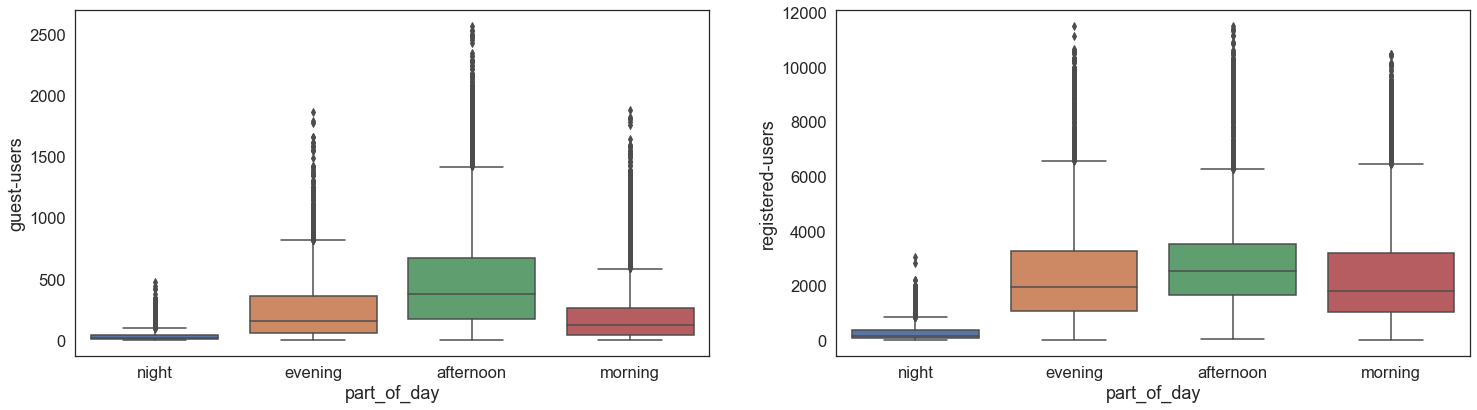

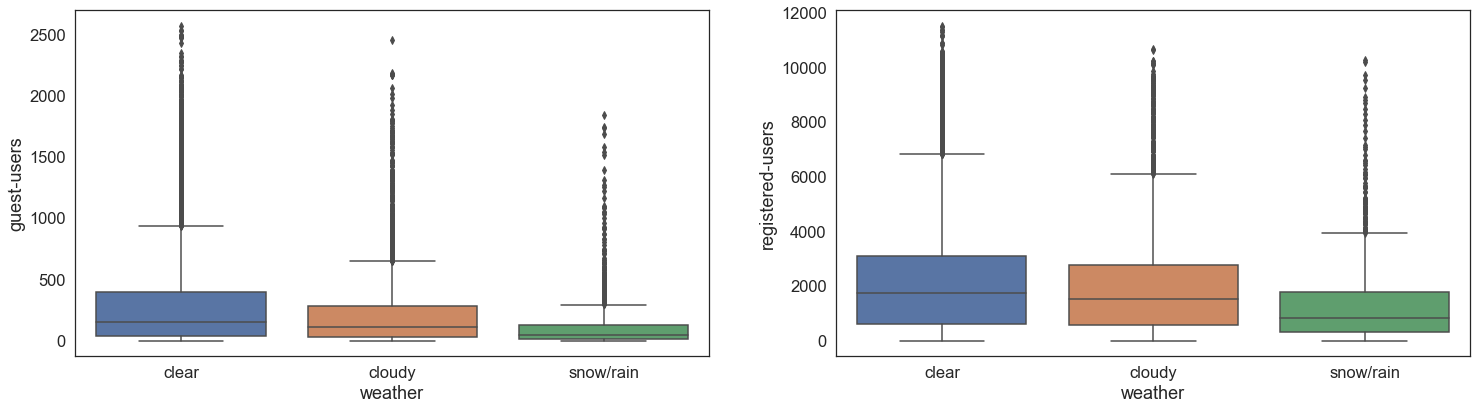

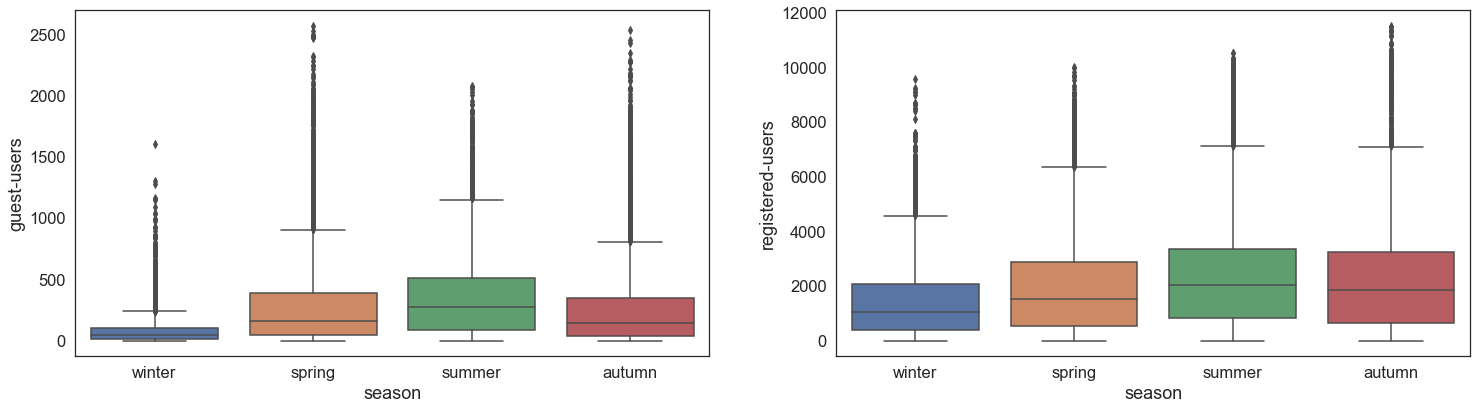

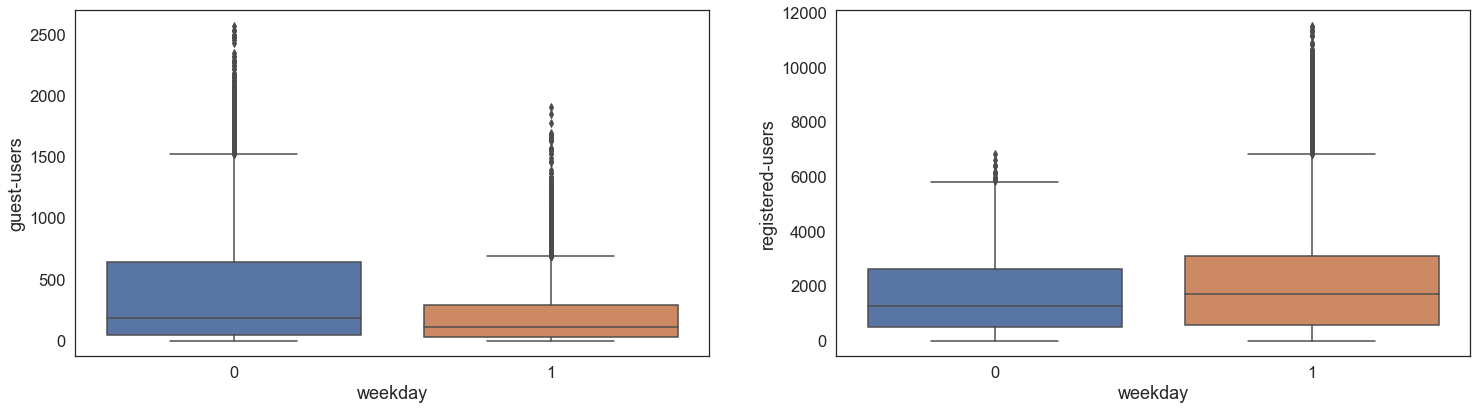

In [28]:
sns.set(font_scale=1.5)
sns.set_style("white")

fig_1 = plt.figure(figsize=(25,14))
fig1 = fig_1.add_subplot(221);
sns.boxplot(x='part_of_day', y='guest-users', data=df[['part_of_day', 'guest-users']])
fig2 = fig_1.add_subplot(222);
sns.boxplot(x='part_of_day', y='registered-users', data=df[['part_of_day', 'registered-users']])

fig_2 = plt.figure(figsize=(25,14))
fig1 = fig_2.add_subplot(221);
sns.boxplot(x='weather', y='guest-users', data=df[['weather', 'guest-users']])
fig2 = fig_2.add_subplot(222);
sns.boxplot(x='weather', y='registered-users', data=df[['weather', 'registered-users']])

fig_3 = plt.figure(figsize=(25,14))
fig1 = fig_3.add_subplot(221);
sns.boxplot(x='season', y='guest-users', data=df[['season', 'guest-users']])
fig2 = fig_3.add_subplot(222);
sns.boxplot(x='season', y='registered-users', data=df[['season', 'registered-users']])

fig_4 = plt.figure(figsize=(25,14))
fig1 = fig_4.add_subplot(221);
sns.boxplot(x='weekday', y='guest-users', data=df[['weekday', 'guest-users']])
fig2 = fig_4.add_subplot(222);
sns.boxplot(x='weekday', y='registered-users', data=df[['weekday', 'registered-users']])

Moving on, we begin with analyzing the relationship of categorical variables against the target variables:
* There is a distinction in the **distribution of users with the part of the day**. Active users tend to be **highest in the afternoon, and lowest in the night**. The trend makes logical sense; people would be sleeping in the night, and most activities happen in the afternoon.
* There is a distinction in the **distribution of users with the weather**. Generally, active users are **higher when weather is cloudy or clear, lower when there is rain/snow**. Again, the trend makes logical sense; people would not want to be outdoors when the weather is bad, vice versa.
* There is some distinction in the **distribution of users with the season**. Generally, active users in **winter is significantly lower than in summer**. Outdoor exposure is minimized during winter as the weather conditions are not favourable. When the weather conditions becomes more favourable (ie. in summer), people are more willing to be outdoors.
* There is some distinction in the **distribution of users with the day of the week**. **Guest users are higher on weekends, while registered users are higher on weekdays**. One way to look at this would be that registered users tend to use the rental scooter as part of their regular commute to work/school on weekdays, explaining the higher number of registered users on weekdays. Guest users could generally be available only on weekends to try out/use the rental scooter, whlist having their own regular commute options on weekdays.

### 4.6. Relationship of continuous variables with target variables

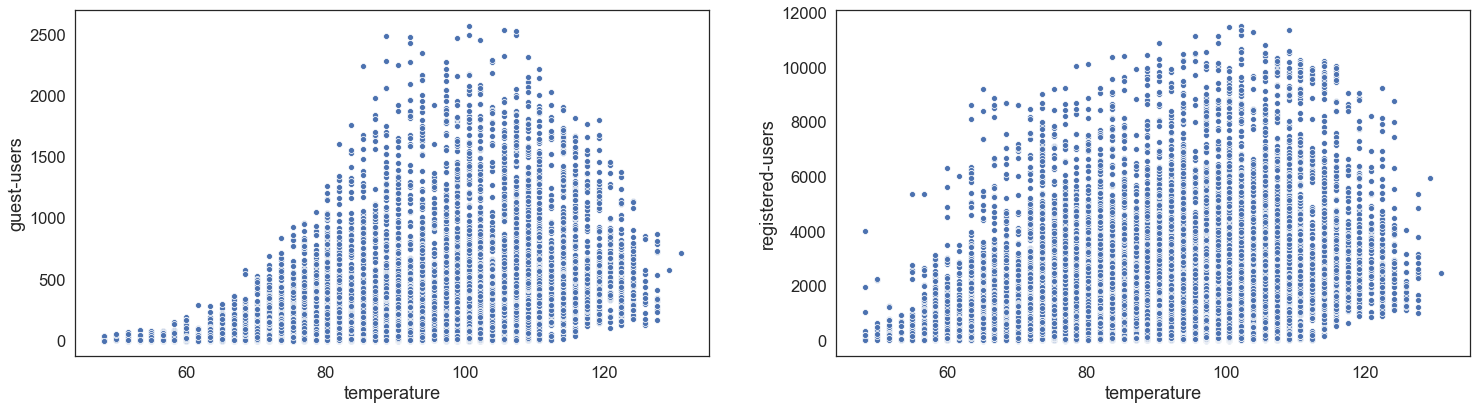

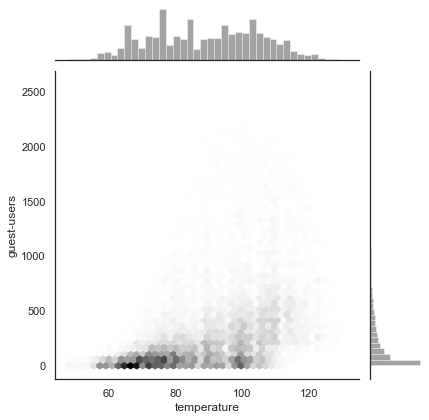

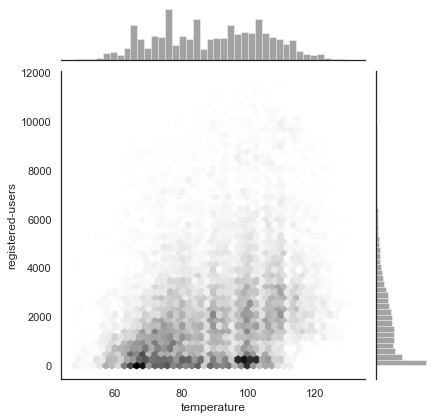

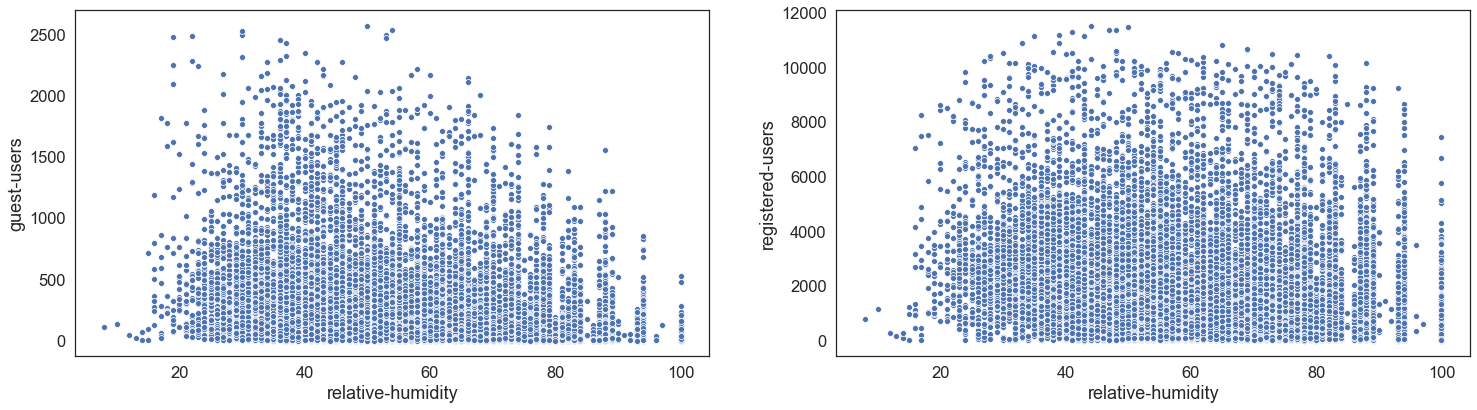

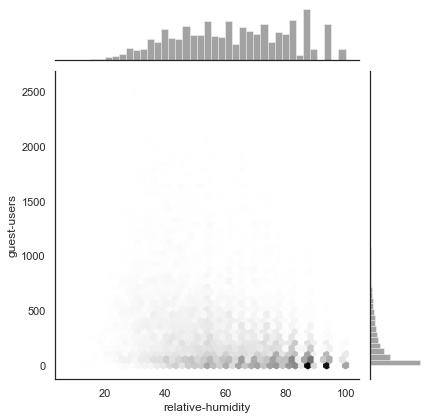

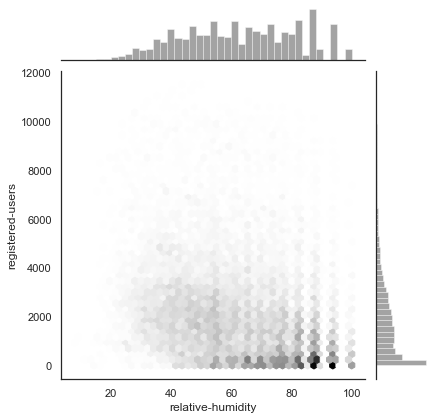

In [29]:
fig_5 = plt.figure(figsize=(25,14))
fig1 = fig_5.add_subplot(221);
sns.scatterplot(x='temperature', y='guest-users', data=df[['temperature', 'guest-users']])
fig2 = fig_5.add_subplot(222);
sns.scatterplot(x='temperature', y='registered-users', data=df[['temperature', 'registered-users']])

#plotting with a hexbin will allow for easier observation of the relationship
sns.set(font_scale=1)
sns.set_style("white")
sns.jointplot(x='temperature', y='guest-users', data=df[['temperature', 'guest-users']],kind="hex",color="k")
sns.jointplot(x='temperature', y='registered-users', data=df[['temperature', 'registered-users']],kind="hex",color="k")

sns.set(font_scale=1.5)
sns.set_style("white")
fig_6 = plt.figure(figsize=(25,14))
fig1 = fig_6.add_subplot(221);
sns.scatterplot(x='relative-humidity', y='guest-users', data=df[['relative-humidity', 'guest-users']])
fig1 = fig_6.add_subplot(222);
sns.scatterplot(x='relative-humidity', y='registered-users', data=df[['relative-humidity', 'registered-users']])

#plotting with a hexbin will allow for easier observation of the relationship
sns.set(font_scale=1)
sns.set_style("white")
sns.jointplot(x='relative-humidity', y='guest-users', data=df[['relative-humidity', 'guest-users']],kind="hex",color="k")
sns.jointplot(x='relative-humidity', y='registered-users', data=df[['relative-humidity', 'registered-users']],kind="hex",color="k")

Next, we analyze the relationship of key numerical variables **"temperature"** and **"relative-humidity"** against the target variables. As seen from the correlation matrix, these two variables have a **significant amount of correlation** with the target variables.

* From the plots, we see that temperature and active users follow a **positive linear relationship**, which indicates that the number of active users increases with increasing temperature. To improve on the variable further, we could transform temperature data into a **downwards concave shape** for a **better fit with the real world**. When the weather is **too cold or too hot**, people would be **less likely to go outdoors**. Active users would hence be expected to decrease when the temperatures are too low or too high, and have a maxima at the perceived comfortable temperature.

* Similarly, for relative humidity, we see that relative humidity and active users follow a **negative linear relationship**, which indicates that the number of active users decreases with increasing relative humidity. To improve on the variable further, we could also transform temperature data into a **downwards concave shape** for a **better fit with the real world**. When the air is **too dry or too damp**, it would lead to **discomfort**. Active users would hence be expected to decrease when the relative humidity is too low or too high, and have a maxima at the perceived comfortable humidity level.

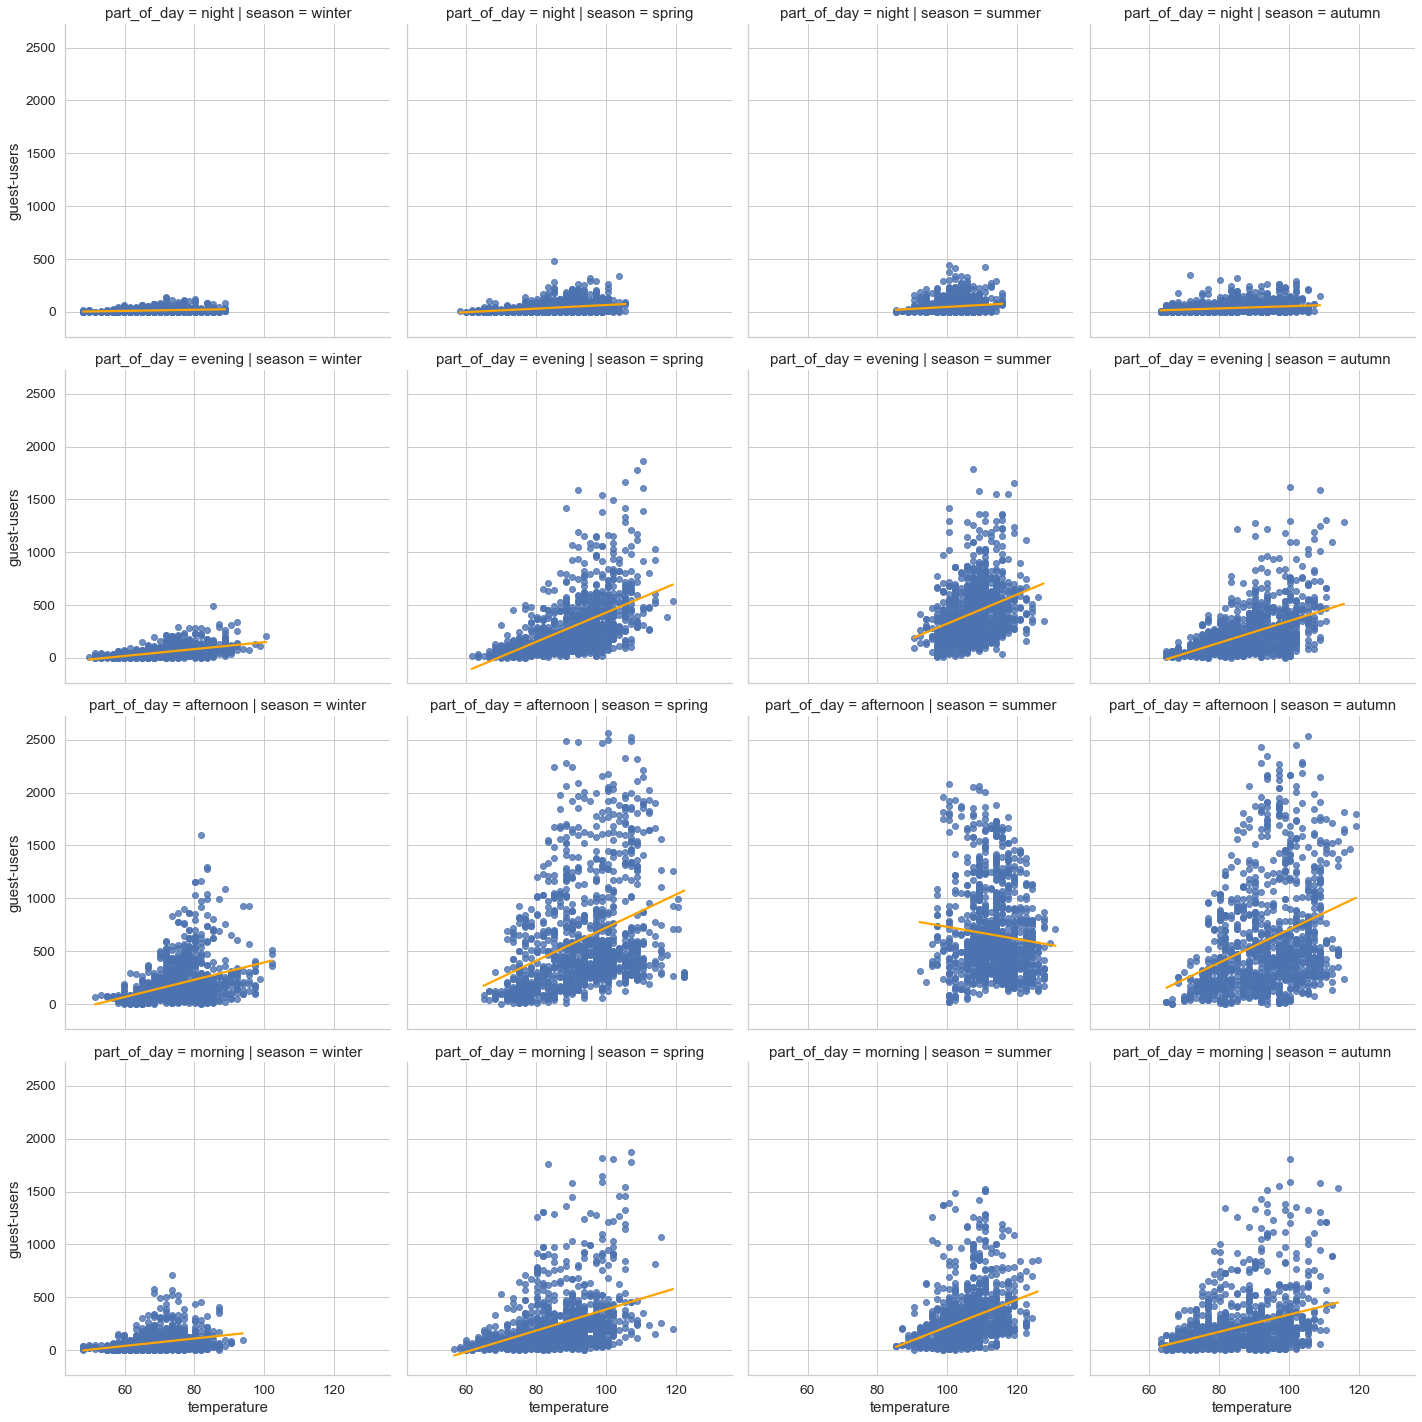

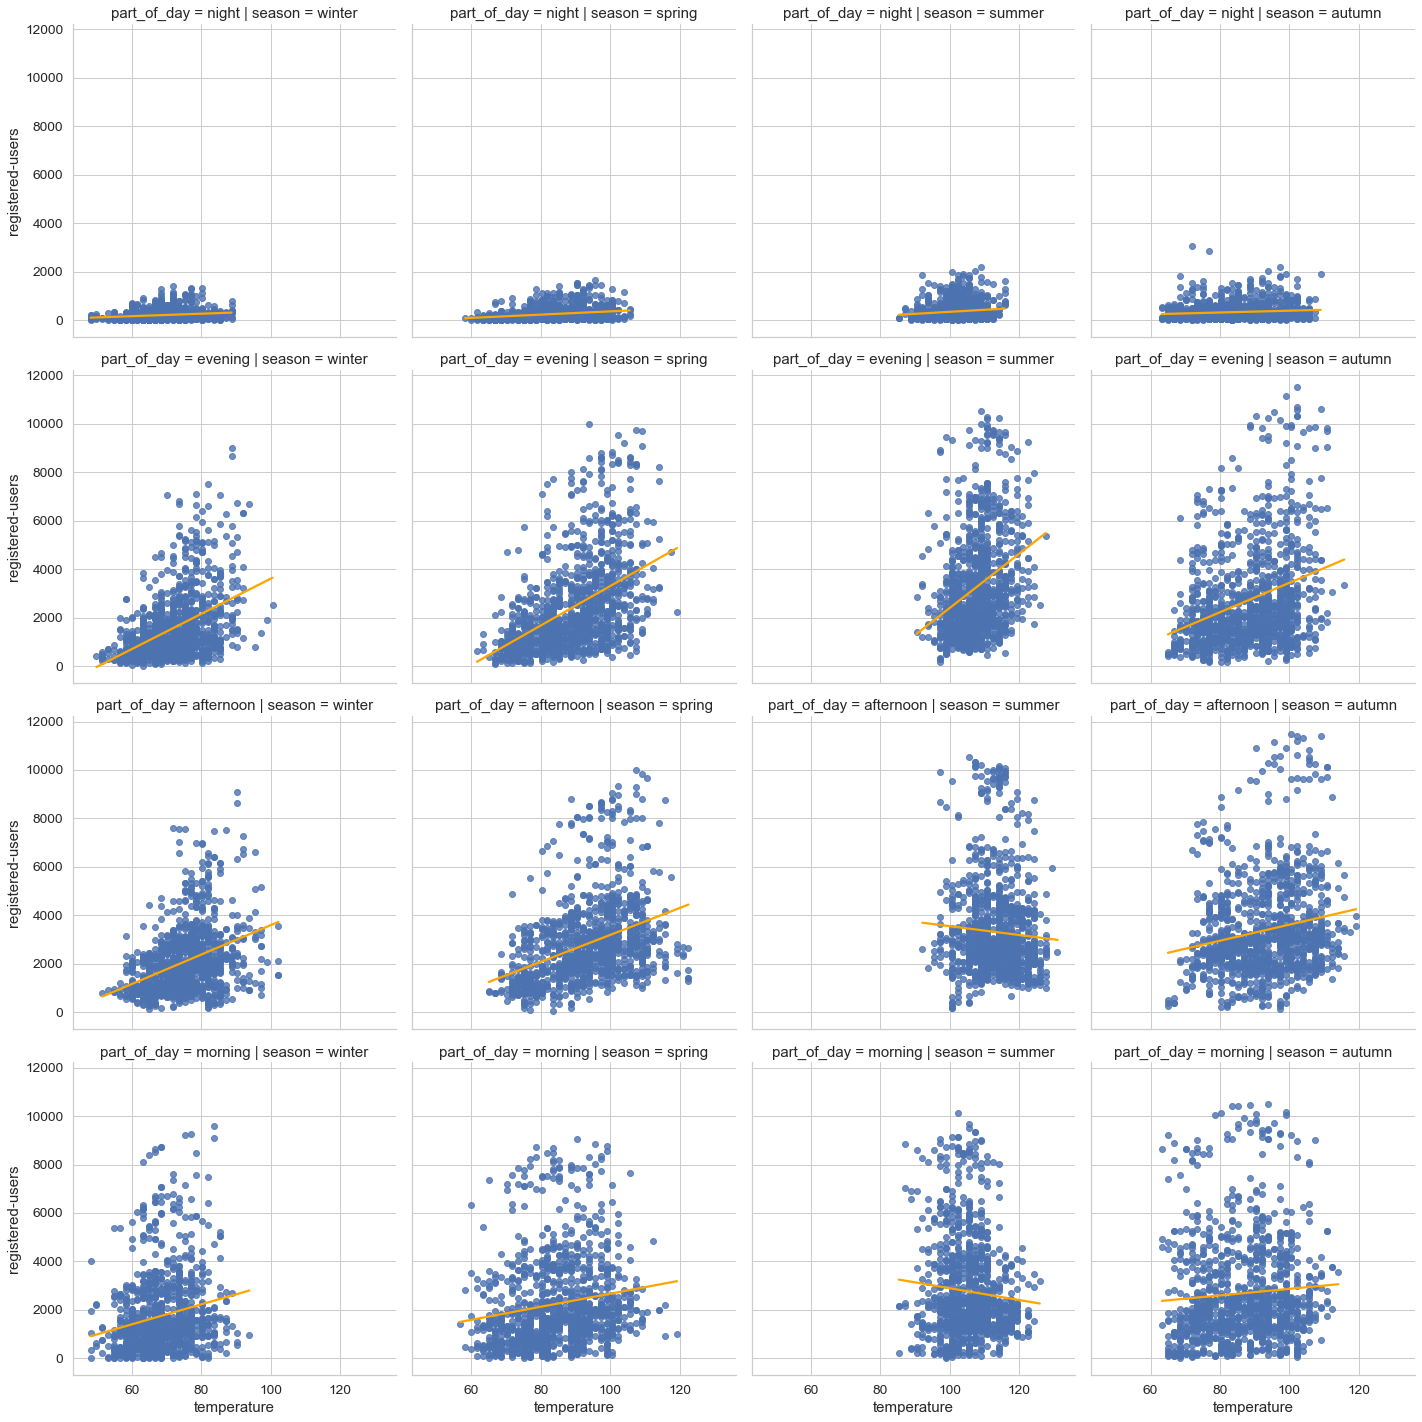

In [30]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
plot_pal = sns.xkcd_palette(["windows blue", "amber", "faded green"])

fg1 = sns.lmplot(x="temperature",y="guest-users",data = df[["temperature","guest-users","season","part_of_day","weather"]],
                    col="season",row="part_of_day",ci=None,fit_reg=True,line_kws={'color': 'orange'})
fg2 = sns.lmplot(x="temperature",y="registered-users",data = df[["temperature","registered-users","season","part_of_day","weather"]],
                    col="season",row="part_of_day",ci=None,fit_reg=True,line_kws={'color': 'orange'})

To illustrate the point that a downwards concave shape would be a better fit for modelling temperature to the target variables, we can use a facet grid to disect the relationship further, by plotting temperature against the target variables while using **"part_of_day"** and **"season"** variables as conditions, as these two variables has the **largest effect on temperature**.

Most of the plots show the **positive linear relationship**. However if we focus on the plots during the **summer** season and in the **afternoon**, there is a **negative linear relationship** between temperature and both target variables. Temperatures averages are the highest in the summer afteroon, hence any further increase in temperature would cause the weather to be too hot, which would possibly lead to a decrease in active users.

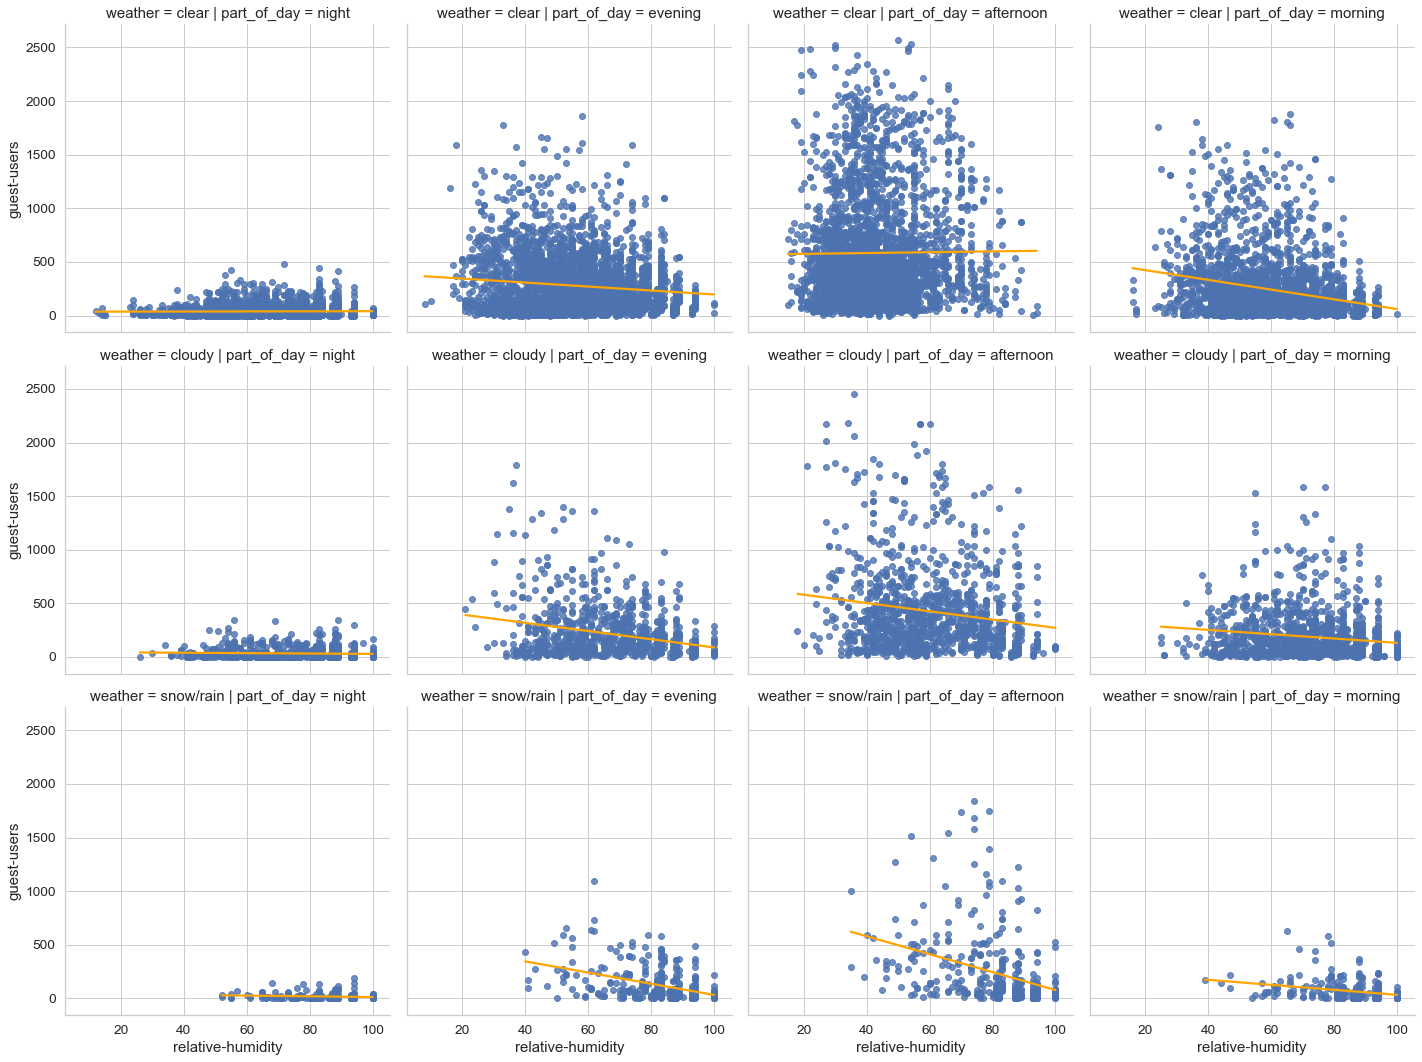

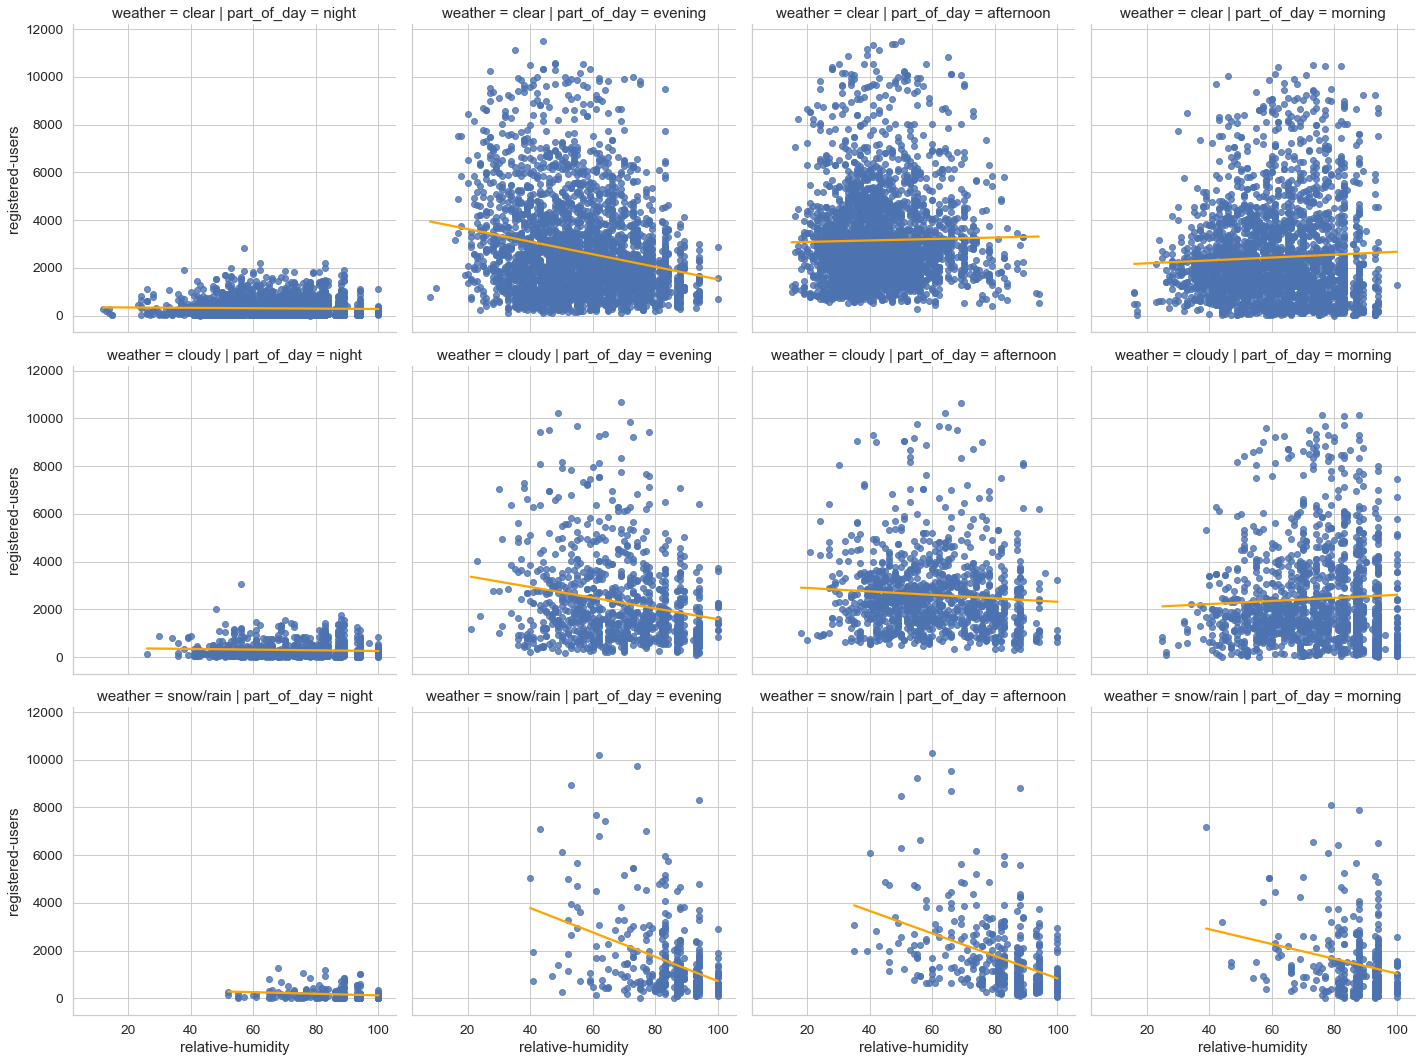

In [31]:
plot_pal = sns.xkcd_palette(["windows blue", "amber", "faded green","dusty purple"])

fg3 = sns.lmplot(x="relative-humidity",y="guest-users",data = df[["relative-humidity","guest-users","season","part_of_day","weather"]],
                    col="part_of_day",row="weather",ci=None,fit_reg=True,line_kws={'color': 'orange'})
fg4 = sns.lmplot(x="relative-humidity",y="registered-users",data = df[["relative-humidity","registered-users","season","part_of_day","weather"]],
                    col="part_of_day",row="weather",ci=None,fit_reg=True,line_kws={'color': 'orange'})

Similarly, to illustrate the point that a downwards concave shape would be a better fit for modelling relative humidity to the target variables, we can use a facet grid to disect the relationship further by plotting relative humidity against the target variables while using **"part_of_day"** and **"weather"** variables as conditions, as these two variables has the **largest effect on relative-humidity**.

Most of the plots show the **negative linear relationship**. However if we focus on the plots during the **afternoon** and when the weather is **clear**, there is **some positive linear relationship** between relative humidity and both target variables. Relative humidity would generally be the lower in the afteroon and when the weather is clear, hence any further decrease in humidity would cause the air to be too dry, which would possibly lead to a decrease in active users.

<br>

## 5. Feature Engineering

### 5.1. *apparent-temperature* feature

In [32]:
#we first attempt to create "apparent-temperature" variable that functions similarly to what we would expect from
#feels-like temperature.

#units for windspeed is not given. Likely to be in mph or ft/s given the units of temperature (imperial units)
temp_celsius = (df["temperature"]-32)*(5/9)
water_vap_p = (df["relative-humidity"]/100)*6.105*np.exp((17.27*(temp_celsius))/(237.7+temp_celsius))

wind_metre_s = df["windspeed"]/2.237
#assuming windspeed as mph
apparent_t = temp_celsius+0.33*(water_vap_p)-0.7*(wind_metre_s)-4
df["apparent-temperature"] = apparent_t * 9/5 + 32

wind_metre_s_1 = df["windspeed"]/3.281
#assuming windspeed as ft/s
apparent_t_1 = temp_celsius+0.33*(water_vap_p)-0.7*(wind_metre_s_1)-4
df["apparent-temperature_1"] = apparent_t_1 * 9/5 + 32

df3 = df[["temperature","relative-humidity","windspeed","apparent-temperature","apparent-temperature_1"]]
df3.head()

,temperature,relative-humidity,windspeed,apparent-temperature,apparent-temperature_1
0,66.7,81.0,0.0,70.230174,70.230174
23,85.3,88.0,20.0,88.451590,92.036092
22,80.2,94.0,15.0,84.138952,86.827328
21,80.2,87.0,13.0,83.806797,86.136723
20,80.2,87.0,17.0,81.553780,84.600606


We can create a variable that functions similar to "feels-like-temperature" variable by substituting temperature, humidity and windspeed into relevant equations to get the apparent temperature.

More information on the apparent temperature calculation can be found here:
https://www.vcalc.com/wiki/rklarsen/Australian+Apparent+Temperature+%28AT%29
    
By creating this variable, it would allow us to **extract information from the "windspeed" variable**. Ideally, we expect windspeed to have an effect on active users, but will be heavily dependent on the temperature and relative humidity.

Having **high windspeeds at low temperatures** would discourage people from renting scooters as it **amplifies the chilling effect from low temperatures**, but at high temperatures we would expect to see the opposite effect, as high windspeed would **reduce the effect of the heat from high temperature**, vice versa for low windspeeds.

Apparent temperature is similar to feels-like temperature, which adjusts temperature by **negatively compensating for increasing windspeed** and **positively compensating for increasing relative humidity**. The higher the windspeed, the lower the apparent temperature / feels-like temperature. The higher the relative humidity, the higher the apparent temperature / feels-like temperature.    

We shall attempt to use apparent temperature since we concluded feels-like temperature data might not be reliable. **Note that we created 2 versions of apparent temperature due to uncertainty in the units for "windspeed"**.

In [35]:
#polynomial (order 2) function
df["temperature_sq"] = np.square(df["temperature"])
df["apparent-temperature_sq"] = np.square(df["apparent-temperature"])
df["apparent-temperature_1_sq"] = np.square(df["apparent-temperature_1"])
df["relative-humidity_sq"] = np.square(df["relative-humidity"])

#polynomial (order 3) function
df["temperature_cb"] = np.power(df["temperature"],3)
df["apparent-temperature_cb"] = np.power(df["apparent-temperature"],3)
df["apparent-temperature_1_cb"] = np.power(df["apparent-temperature_1"],3)
df["relative-humidity_cb"] = np.power(df["relative-humidity"],3)

### 5.2. Mapping *temperature* and *relative-humidity* into non-linear functions

As mentioned in the data analysis portion, we would expect the relationship between the variables "temperature" and "relative-humidity" against the target variables to follow a downwards concave trend better.

We can map the variables to a **polynomial function** to achieve the desired shape. A higher order polynomial function might be more appropriate, as we would not expect active users to **sharply drop off to 0 at the extremes of temperature and relative humidity conditions**. We would likely expect a handful of users who are still willing to brave the extreme conditions. A polynomial function of order 3 and above might be able to model this better.

In [36]:
df4 = df[["temperature","temperature_sq","temperature_cb","apparent-temperature","apparent-temperature_sq","apparent-temperature_cb",
         "apparent-temperature_1","apparent-temperature_1_sq","apparent-temperature_1_cb","relative-humidity","relative-humidity_sq",
          "relative-humidity_cb","guest-users","registered-users","cbrt_guest-users","cbrt_registered-users"]] 

### 5.3. Evaluation of new features

In [37]:
#lets evaluate the newly created variables
df4_summary = summary(df4)
df4_summary

,types,counts,distincts,nulls,missing pct,uniques,skewness,kurtosis
temperature,float64,17289,50,0,0.0,"[[66.7, 85.3, 80.2, 81.9, 83.6, 78.5, 76.9, 65...",-0.022533,-0.938036
temperature_sq,float64,17289,50,0,0.0,"[[4448.89, 7276.089999999999, 6432.04000000000...",0.266280,-0.827657
temperature_cb,float64,17289,50,0,0.0,"[[296740.96300000005, 620650.477, 515849.60800...",0.551481,-0.461224
apparent-temperature,float64,17289,6732,0,0.0,"[[70.23017431628377, 88.45159017537557, 84.138...",-0.016474,-1.124787
apparent-temperature_sq,float64,17289,6732,0,0.0,"[[4932.277384495604, 7823.6838045525965, 7079....",0.329213,-1.062218
apparent-temperature_cb,float64,17289,6732,0,0.0,"[[346394.7004893904, 692017.2735420094, 595650...",0.633677,-0.686112
apparent-temperature_1,float64,17289,6732,0,0.0,"[[70.23017431628377, 92.03609215825011, 86.827...",-0.004720,-1.156437
apparent-temperature_1_sq,float64,17289,6732,0,0.0,"[[4932.277384495604, 8470.642259761908, 7538.9...",0.317827,-1.087856
apparent-temperature_1_cb,float64,17289,6732,0,0.0,"[[346394.7004893904, 779604.811659015, 654589....",0.606909,-0.745598
relative-humidity,float64,17289,88,0,0.0,"[[81.0, 88.0, 94.0, 87.0, 82.0, 77.0, 72.0, 76...",-0.072388,-0.911783


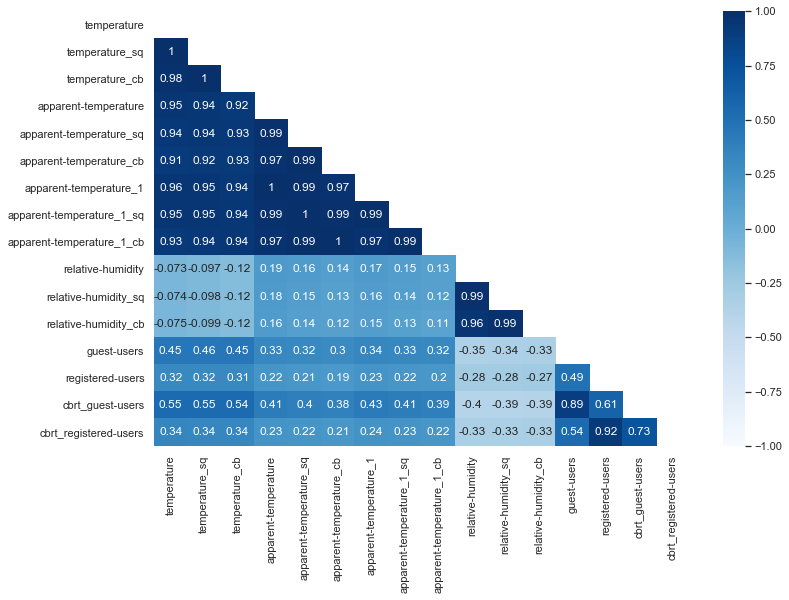

In [38]:
df4_corr_matrix = df4.corr()
mask_ = np.triu(df4_corr_matrix)

sns.set(font_scale = 1)
sns.set_style("white")
corr_plot_1 = plt.figure(figsize=(12,8))
sns.heatmap(df4_corr_matrix,cmap='Blues',annot=True,vmin=-1, vmax=1, center= 0, mask = mask_) 

The "apparent-temperature" variable **degrades correlation** against the target variables as compared to "temperature" variables. We would likely not favour the use of this feature as a replacement for "temperature".

For the variables mapped to polynomial functions, the correlation **does not degrade**. It could be better to use these transformed variables as it has **more relatability to the real world**. For a model that uses the transformed temperature variable, it could **generalize better** to new observations out of the training dataset range as well.

With that, we will end the EDA process here and proceed with modelling the refined dataset.